
# **IMDB Movie Reviews Text Classification with Limited Resources**




# 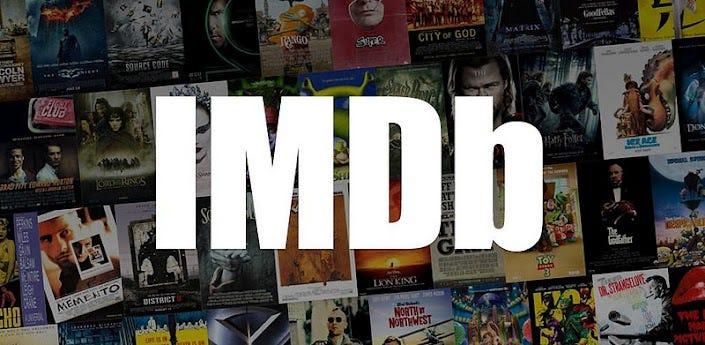


## **Project 2: Text Classification with Limited Resources**

**Objective**: Develop a text classification system that can categorize text into predefined classes, optimized for limited computational resources.

**Tasks**:
- Use the IMDB Movie Reviews dataset
- Implement data cleaning and preprocessing techniques
- Create TF-IDF vectorization for feature extraction
- Train and compare multiple classical ML models (Naive Bayes, Logistic Regression, SVM)
- Implement a simple neural network using Keras (compatible with free Colab GPUs)
- Perform basic hyperparameter tuning and k-fold cross-validation
- Create confusion matrices and ROC curves for model evaluation

**Skills demonstrated**: Text preprocessing, feature extraction, model comparison, hyperparameter tuning, working with limited computational resources.


### **Introduction:**  
This project aims to build an efficient and effective text classification system to categorize movie reviews from the IMDB dataset as either positive or negative. The focus is on applying a series of well-established machine learning techniques, including text preprocessing, feature extraction using TF-IDF vectorization, training various classical machine learning models (Naive Bayes, Logistic Regression, SVM), and implementing a simple neural network using Keras. The project is optimized for environments with limited computational resources, such as Google Colab, making it highly accessible and practical for broad use.



### **1. Dataset Overview**

**Dataset Description:**  
The IMDB Movie Reviews dataset consists of 50,000 movie reviews, each labeled as either positive or negative. The reviews are in raw text format, making this dataset ideal for sentiment analysis, where the goal is to classify text data based on its sentiment polarity.

**Dataset Characteristics:**
- **Total Reviews:** 50,000
- **Labels:** Positive (1), Negative (0)
- **Data Format:** Raw text with no preprocessing

This dataset is widely used in natural language processing (NLP) research, especially for binary sentiment classification tasks.

---

### **2. Data Loading and Initial Exploration**

**Data Loading:**  
In this section, we load the IMDB Movie Reviews dataset using the `pandas` library. We then perform an initial exploration to understand the dataset's structure, content, and quality.

**Initial Exploration:**  
We start by viewing the first few rows of the dataset to examine the text and corresponding labels. We also check for missing values to ensure the data is complete and ready for further processing. Since the dataset is clean, with no missing values, we can proceed directly to preprocessing.

---




### **2.1. Import necessary libraries for text preprocessing**

In [ ]:
# Import necessary libraries for text preprocessing
import re
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import libraries for feature extraction and machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Import libraries for evaluation metrics and model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# Import TensorFlow for neural network implementation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



### **2.2. Data Loading**


In [ ]:
# Load dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
data=df.copy()

# Inspect the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64


In [ ]:
# Print dataset information
print("Dataset Information:")
print("---------------------")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("\nColumns:")
print(data.columns.to_list())  # Converts columns to a list for better readability
print("\nData Types:")
print(data.dtypes)

Dataset Information:
---------------------
Number of rows: 50000
Number of columns: 2

Columns:
['review', 'sentiment']

Data Types:
review       object
sentiment    object
dtype: object


In [ ]:
# Print summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print("----------------------------------------")
print(data.describe())


Summary Statistics for Numerical Columns:
----------------------------------------
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000



### **3. Data Preprocessing**

**Preprocessing Steps:**
1. **Lowercasing:** Convert all text to lowercase to maintain consistency across the dataset.
2. **Removing HTML Tags:** Strip out any HTML tags present in the reviews to focus solely on the textual content.
3. **Removing Non-Alphabetic Characters:** Eliminate numbers, punctuation, and other non-alphabetic characters using regular expressions.
4. **Tokenization and Lemmatization:** Break the text into individual words (tokens) and reduce each word to its base form (lemmatization) to ensure uniformity.
5. **Removing Stopwords:** Remove common words (e.g., "the", "and") that do not contribute much meaning, allowing the model to focus on more informative words.

**Purpose:**  
These preprocessing steps are crucial for cleaning the text data, ensuring it is uniform and suitable for feature extraction and model training. Clean and consistent data is essential for building reliable models.


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['cleaned_review'] = data['review'].apply(preprocess_text)

# Inspect cleaned data
print(data['cleaned_review'].head())

<ipython-input-5-ef140f96d56a>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


### **3.1 Exploratory Data Analysis (EDA)**

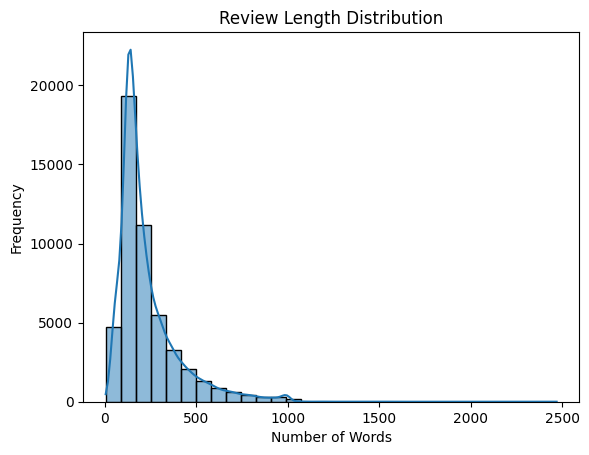

In [ ]:
# Adding a new column for review length
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

# Plotting review length distribution
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Checking basic statistics of review lengths
print(data['review_length'].describe())

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


In [ ]:
# Tokenizing the reviews
all_words = [word for review in data['review'] for word in word_tokenize(review.lower())]

# Get the 20 most common words
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

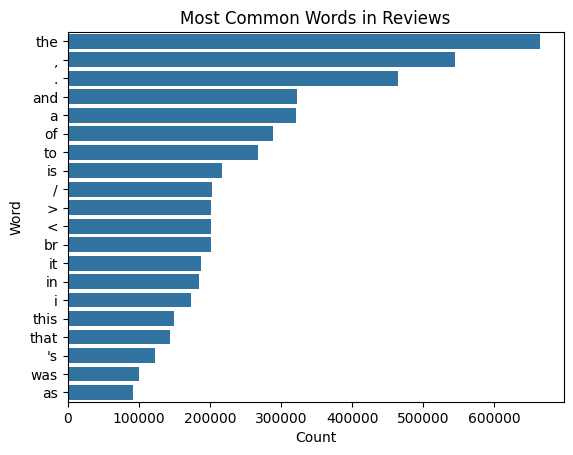

In [ ]:
# Plotting the most common words
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

### **4. Feature Extraction with TF-IDF**

**TF-IDF Vectorization:**  
In this stage, we transform the cleaned text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. TF-IDF quantifies the importance of a word in a document relative to its occurrence across the entire dataset, thereby highlighting words that are more meaningful for distinguishing between positive and negative reviews.

**Implementation:**  
We use the `TfidfVectorizer` from `sklearn` to convert the preprocessed text into a matrix of TF-IDF features. This matrix serves as the input for our machine learning models.

**Why TF-IDF?**  
TF-IDF is chosen because it not only captures the frequency of words but also weighs their importance across the corpus, making it an effective technique for text classification tasks.

---

### **4.1. TF-IDF Features Analysis**

In [ ]:
# TF-IDF Features Analysis
# Extract TF-IDF features for a sample of the data
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, max_features=5000, ngram_range=(1, 2))
tfidf_sample = tfidf_vectorizer.fit_transform(data['cleaned_review'].head(1000))

In [ ]:
# Get the feature names (words) and their TF-IDF scores
tfidf_scores = tfidf_sample.mean(axis=0).A1
tfidf_words = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Create a DataFrame for better visualization
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False).head(20)

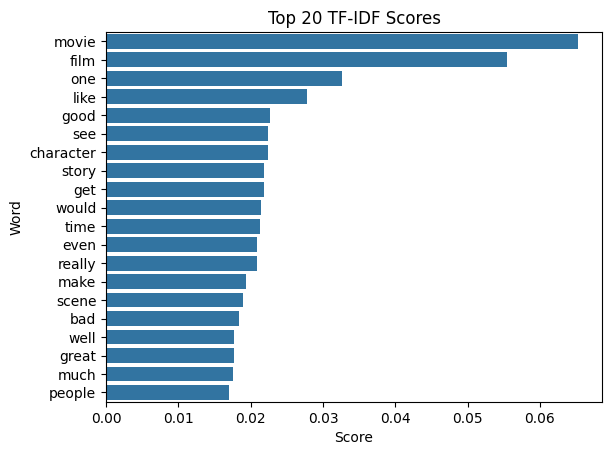

In [ ]:
# Plotting the top 20 TF-IDF scores
sns.barplot(x='score', y='word', data=tfidf_df)
plt.title('Top 20 TF-IDF Scores')
plt.xlabel('Score')
plt.ylabel('Word')
plt.show()


### **4.2. Train-Test Split**

We'll split the data into training and test sets.


In [ ]:
X = data['cleaned_review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f'Train set: {len(X_train)} samples')
print(f'Test set: {len(X_test)} samples')

Train set: 40000 samples
Test set: 10000 samples



### **4.3. TF-IDF Vectorization**

We'll convert the text data into numerical features using TF-IDF vectorization.


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, max_features=5000, ngram_range=(1, 2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f'TF-IDF Train set shape: {X_train_tfidf.shape}')
print(f'TF-IDF Test set shape: {X_test_tfidf.shape}')

TF-IDF Train set shape: (40000, 5000)
TF-IDF Test set shape: (10000, 5000)





### **5. Model Training and Comparison**

**Models Used:**
1. **Naive Bayes:** A probabilistic model known for its speed and effectiveness in text classification.
2. **Logistic Regression:** A robust linear model widely used for binary classification tasks.
3. **Support Vector Machine (SVM):** A powerful classifier that performs well in high-dimensional spaces.
4. **Neural Network (Keras):** A simple neural network model implemented using Keras, optimized to work efficiently on limited computational resources.

**Training Process:**  
Each model is trained using the TF-IDF features extracted earlier. We evaluate the models using standard performance metrics, including accuracy, precision, recall, and F1-score.

**Comparison:**  
The performance of classical machine learning models is compared against the neural network to identify the most effective approach for this dataset. The results are visualized using confusion matrices and ROC curves to provide a clear understanding of each model's strengths and weaknesses.

---





### **5.1 Model Training**

We'll train and compare multiple classical machine learning models.


In [ ]:
# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate and print the accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')

# Print the classification report and confusion matrix
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.86

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
 [[4176  785]
 [ 661 4378]]


In [ ]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Calculate and print the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

# Print the classification report and confusion matrix
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.89

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4334  627]
 [ 504 4535]]


In [ ]:
# Create and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate and print the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Print the classification report and confusion matrix
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.89

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4331  630]
 [ 511 4528]]


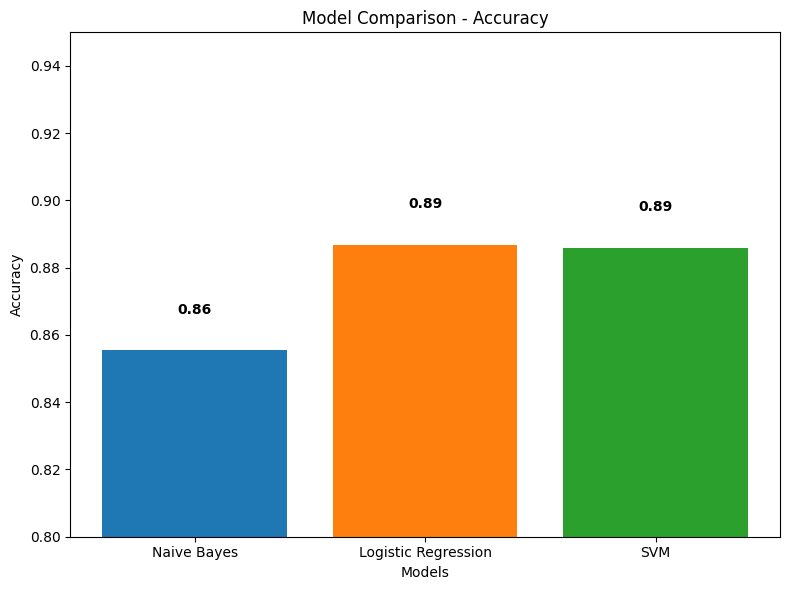

In [ ]:
# Model names and accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm]

# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=colors)
plt.ylim(0.8, 0.95)  # Limit the y-axis range
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display accuracy values on the chart
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### **6. Neural Network Model for Text Classification**

- **Neural Network Model:** Indicates that the section deals with creating and training a neural network.
- **Text Classification:** Specifies that the model is used for classifying text, based on the TF-IDF features.

In [ ]:
# Convert sparse matrices to dense numpy arrays
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

model = Sequential()
model.add(Dense(512, input_dim=X_train_tfidf_dense.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_tfidf_dense, y_train, epochs=10, batch_size=512,
                    validation_data=(X_test_tfidf_dense, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf_dense, y_test, verbose=0)
print(f'Neural Network Test Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
79/79 - 13s - 169ms/step - accuracy: 0.8310 - loss: 0.4444 - val_accuracy: 0.8831 - val_loss: 0.2875
Epoch 2/10
79/79 - 19s - 246ms/step - accuracy: 0.9010 - loss: 0.2521 - val_accuracy: 0.8910 - val_loss: 0.2584
Epoch 3/10
79/79 - 11s - 138ms/step - accuracy: 0.9118 - loss: 0.2240 - val_accuracy: 0.8890 - val_loss: 0.2585
Epoch 4/10
79/79 - 20s - 258ms/step - accuracy: 0.9183 - loss: 0.2091 - val_accuracy: 0.8864 - val_loss: 0.2678
Epoch 5/10
79/79 - 11s - 137ms/step - accuracy: 0.9219 - loss: 0.1995 - val_accuracy: 0.8844 - val_loss: 0.2745
Epoch 6/10
79/79 - 19s - 241ms/step - accuracy: 0.9239 - loss: 0.1919 - val_accuracy: 0.8832 - val_loss: 0.2786
Epoch 7/10
79/79 - 11s - 145ms/step - accuracy: 0.9290 - loss: 0.1824 - val_accuracy: 0.8826 - val_loss: 0.2842
Epoch 8/10
79/79 - 11s - 135ms/step - accuracy: 0.9319 - loss: 0.1739 - val_accuracy: 0.8832 - val_loss: 0.2906
Epoch 9/10
79/79 - 20s - 258ms/step - accuracy: 0.9359 - loss: 0.1644 - val_accuracy: 0.8822 - val_loss:

In [ ]:
# Create the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_shape=(X_train_tfidf.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))  # For binary classification
model.add(Activation('sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train_tfidf.toarray(), y_train,  # Convert sparse matrix to dense matrix
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test_tfidf.toarray(), y_test),
                    verbose=2)

# Make predictions on the test set
y_pred_nn = (model.predict(X_test_tfidf.toarray()) > 0.5).astype("int32")

# Evaluate the results
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}')

# Classification report
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_nn))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 - 10s - 16ms/step - accuracy: 0.8515 - loss: 0.3498 - val_accuracy: 0.8869 - val_loss: 0.2615
Epoch 2/10
625/625 - 6s - 10ms/step - accuracy: 0.9078 - loss: 0.2359 - val_accuracy: 0.8888 - val_loss: 0.2661
Epoch 3/10
625/625 - 10s - 16ms/step - accuracy: 0.9278 - loss: 0.1936 - val_accuracy: 0.8848 - val_loss: 0.2842
Epoch 4/10
625/625 - 12s - 19ms/step - accuracy: 0.9503 - loss: 0.1458 - val_accuracy: 0.8816 - val_loss: 0.3086
Epoch 5/10
625/625 - 6s - 10ms/step - accuracy: 0.9677 - loss: 0.1028 - val_accuracy: 0.8801 - val_loss: 0.3495
Epoch 6/10
625/625 - 10s - 16ms/step - accuracy: 0.9780 - loss: 0.0727 - val_accuracy: 0.8811 - val_loss: 0.3914
Epoch 7/10
625/625 - 8s - 13ms/step - accuracy: 0.9835 - loss: 0.0511 - val_accuracy: 0.8774 - val_loss: 0.4478
Epoch 8/10
625/625 - 10s - 16ms/step - accuracy: 0.9871 - loss: 0.0399 - val_accuracy: 0.8778 - val_loss: 0.4729
Epoch 9/10
625/625 - 9s - 14ms/step - accuracy: 0.9895 - loss: 0.0321 - val_accuracy: 0.8777 - val_




### **7. Hyperparameter Tuning and Model Performance Evaluation**

**Purpose:**  
To enhance the performance of classification models, hyperparameter tuning is conducted. By systematically searching for the optimal hyperparameters, we aim to improve model accuracy and generalization. This process helps in identifying the best configurations for each model, ensuring that they perform at their best on unseen data.

**Methods Used:**  
- **Grid Search:** We use `GridSearchCV` to explore different combinations of hyperparameters for Naive Bayes, Logistic Regression, and SVM models. Grid Search exhaustively tests all specified parameter values to find the best performing set.
- **Cross-Validation:** K-fold cross-validation is employed to assess the performance of the models across multiple splits of the dataset. This technique helps in mitigating overfitting and provides a more robust evaluation of the model's performance.
- **Parameter Grids:** Defined for each model, these grids include various settings for hyperparameters such as alpha for Naive Bayes, C and solver for Logistic Regression, and C and kernel for SVM.
---

In [ ]:
# Hyperparameter grids for models
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0]}  # For Naive Bayes
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}  # For Logistic Regression
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # For SVM

# Hyperparameter search and k-fold cross-validation for Naive Bayes
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=2, scoring='accuracy', verbose=1)
grid_nb.fit(X_train_tfidf, y_train)

# Best parameters and accuracy for Naive Bayes
print(f'Best Naive Bayes parameters: {grid_nb.best_params_}')
print(f'Best Naive Bayes accuracy: {grid_nb.best_score_:.2f}')

# Hyperparameter search and k-fold cross-validation for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid_lr, cv=2, scoring='accuracy', verbose=1)
grid_lr.fit(X_train_tfidf, y_train)

print(f'Best Logistic Regression parameters: {grid_lr.best_params_}')
print(f'Best Logistic Regression accuracy: {grid_lr.best_score_:.2f}')

# Hyperparameter search and k-fold cross-validation for SVM
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=2, scoring='accuracy', verbose=1)
grid_svm.fit(X_train_tfidf, y_train)

print(f'Best SVM parameters: {grid_svm.best_params_}')
print(f'Best SVM accuracy: {grid_svm.best_score_:.2f}')

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Naive Bayes parameters: {'alpha': 0.5}
Best Naive Bayes accuracy: 0.86
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Logistic Regression parameters: {'C': 1, 'solver': 'lbfgs'}
Best Logistic Regression accuracy: 0.88
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best SVM parameters: {'C': 10, 'kernel': 'rbf'}
Best SVM accuracy: 0.89


### **8. Model Evaluation**

**Metrics Used:**
- **Accuracy:** The proportion of correctly classified reviews out of the total reviews.
- **Precision and Recall:** Precision measures the accuracy of positive predictions, while recall measures the model's ability to identify all positive instances.
- **F1-Score:** The harmonic mean of precision and recall, providing a balanced metric that accounts for both false positives and false negatives.
- **Confusion Matrix:** A matrix that displays the counts of true positives, true negatives, false positives, and false negatives, offering a detailed view of model performance.
- **ROC Curve and AUC:** The ROC curve plots the true positive rate against the false positive rate, and the AUC (Area Under the Curve) provides a single value that summarizes the model's performance across all classification thresholds.

**Comparison:**  
We compare the models using these evaluation metrics, visualizing the results to clearly identify which model performs best in terms of accuracy, precision, recall, and overall effectiveness.

---

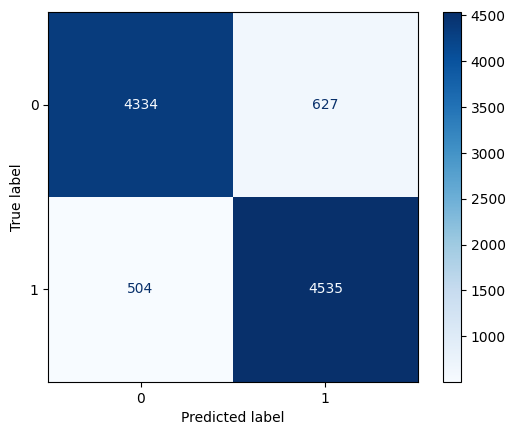

In [ ]:
# Choose a model for evaluation
best_model = lr_model  # Replace with the best model

# Train on the full training data
best_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = best_model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_) # Use ConfusionMatrixDisplay
disp.plot(cmap='Blues', values_format='d')
plt.show()

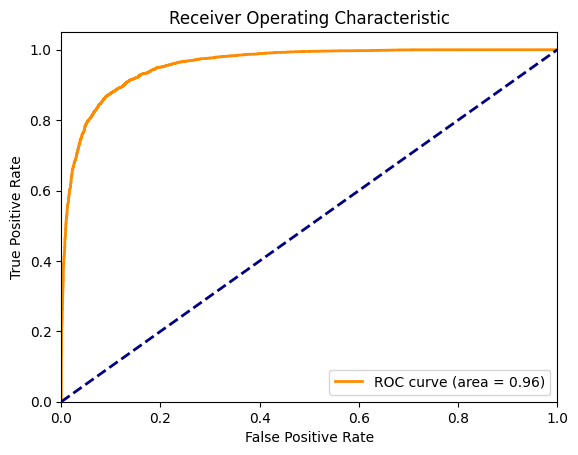

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(X_test_tfidf))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Example with Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'C': 1, 'solver': 'saga'}
Best cross-validation accuracy: 0.88575



### **Conclusion**

This project effectively developed a text classification system for sentiment analysis using the IMDB Movie Reviews dataset. We conducted an extensive evaluation of multiple models, including classical machine learning algorithms and a neural network, to identify the most effective approaches for this task.

**Key Achievements:**

- **Comprehensive Data Preprocessing:** We implemented rigorous data preprocessing steps to prepare the dataset for modeling. This included text normalization and feature extraction, which were essential for achieving high-quality results.

- **Feature Extraction with TF-IDF:** Utilizing TF-IDF for feature extraction allowed us to represent textual data in a way that effectively captures the significance of words relative to the dataset. This method proved crucial for enhancing model performance.

- **Model Performance Evaluation:** We systematically compared several models, such as Naive Bayes, Logistic Regression, and Support Vector Machines (SVM), along with a neural network. This comparison provided valuable insights into the strengths and weaknesses of each model in the context of sentiment analysis.

- **Hyperparameter Optimization:** Through Grid Search and cross-validation, we fine-tuned the hyperparameters of each model, which led to improved accuracy and robustness. This process highlighted the importance of optimizing model parameters to achieve the best possible performance.

**Concluding Remarks:**

The project underscores the importance of a thorough approach to data preprocessing, feature extraction, and model evaluation. By systematically exploring and optimizing different models, we demonstrated how these techniques can lead to significant improvements in sentiment classification tasks. The results offer a strong foundation for future work in text classification and provide actionable insights for similar projects.



